## Scheduling  for hyperparameters 

In [156]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')

from avae import cyc_annealing

The list of the functions available in cyc_annealing:

1. Flat 
2. cycle_linear
3. cycle_sigmoid
4. cycle_cosine
5. Ramp
6. Delta
7. Mixed


Define the following :

1. `function_list` : The name of the functions used in order 
2. `start_stop` : The epoch number to start and stop the corresponding period at
3. `min_max` : The minimum and maximum of the  corresponding period


In [157]:
# The name of the functions used in order 
function_list = ['flat','cycle_cosine', 'flat'] 

# The epoch number to start and stop the corresponding period at
start_stop = [(0, 1200), (1201, 1700), (1701, 2000)]

# The minimum and maximum of the  corresponding period
min_max = [(0, 0), (0, 1), (1, 1)]

In [158]:
def plotting(L):
    plt.figure(figsize=(6, 2))
    plt.plot(L)
    plt.xlabel('Epochs')
    plt.ylabel("y")
    plt.show()

### Create the array 

In [159]:
L = []
for n in range(len(function_list)):
    cyc = cyc_annealing.cyc_annealing(start_stop[n][1]-start_stop[n][0], function_list[n], 1).var \
            * (min_max[n][1] - min_max[n][0]) + min_max[n][0]
    L[start_stop[n][0]:start_stop[n][1]]= cyc
    

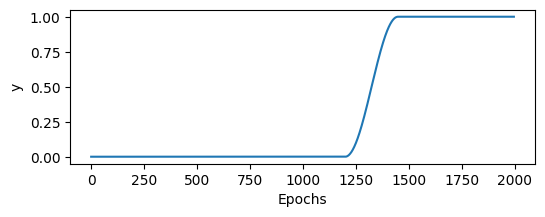

In [160]:
plotting(L)

You can add your own function as well, here I have introduced a function which decreases through oscilations where $T$ defines the period of oscilations:

$y = \cos^2(\frac{2\pi x}{T})\frac{1}{\sqrt{x}}- \frac{x}{T} $

The function is normalised between `[0,1]`

In [241]:
def cosine_decay(epochs,T):
    x = np.arange(1,epochs+1)
    array  = np.cos(x*2*np.pi/T)**2/np.sqrt(x)-x/T
    return (array - min(array))/max(array - min(array))


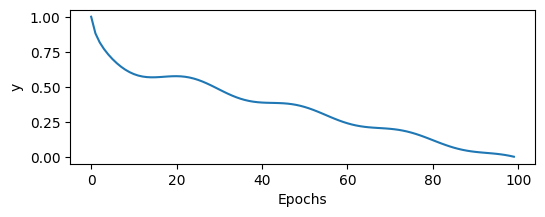

In [242]:
plotting(cosine_decay(100,50))

### Update the values in the array 

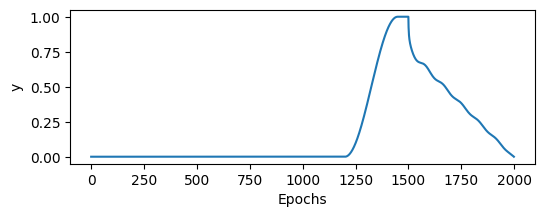

In [243]:
begin = 1500 ; end = 2000
L[begin:end] = cosine_decay(end-begin,(end-begin)/3.0)
plotting(L)

### Save the array 

In [209]:
np.save('gamma_array.npy', L)

### reload for no reason at all :)) and check that it is saved correctly 

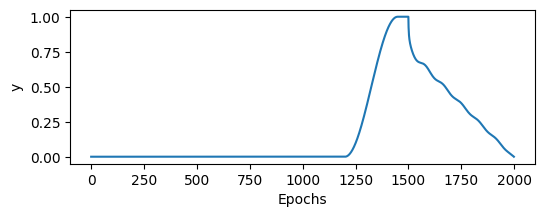

In [212]:
L = np.load('gamma_array.npy')
plotting(L)